#### tensorflow 및 keras 설치

In [1]:
#!pip install tensorflow

In [2]:
#!pip install keras 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf


Using TensorFlow backend.


## 디바이스 확인

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14501051623840268615]

## 데이터셋 생성

In [5]:
np.random.seed(1233231)#seed를 한 상태에서 random을 돌리게 되면, 같은 랜덤 출력을 반환한다
x1 = np.random.random(5000) # x좌표
x2 = np.random.random(5000) # y좌표
print(x1[0 : 10])
print(x2[0 : 5])

[0.16305852 0.07648301 0.0612393  0.43600922 0.92321732 0.92540387
 0.80456686 0.50659277 0.51345946 0.39667097]
[0.81333089 0.44851228 0.85342543 0.10960804 0.82960001]


## 데이터 분포 확인

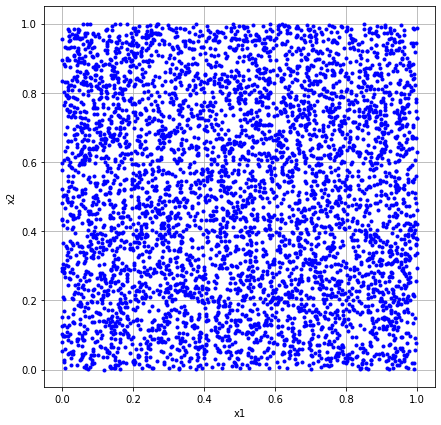

In [9]:
plt.figure(figsize=(7, 7))
plt.plot(x1, x2, 'b.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True) #plot에 그물망(그리드 grid, 영역별 범위)를 그려줌 
plt.show()

## 데이터 분류

In [10]:
def classify_data(x1, x2):
    target = []
    for i in range(len(x1)):
        if x1[i] < 0.5 and x2[i] < 0.5:
            target.append('type1')
        elif x1[i] >= 0.5 and x2[i] < 0.5:
            target.append('type2')
        elif x1[i] < 0.5 and x2[i] >= 0.5:
            target.append('type3')
        elif x1[i] >= 0.5 and x2[i] >= 0.5:
            target.append('type4')
    return np.array(target)

# 데이터의 길이 만큼, 회전하며, x,y좌표에 따라 type구분(4분류) => 8 분류 코드는 기타 파일 참조

In [11]:
target = classify_data(x1, x2)
print(target[0 : 10])



['type3' 'type1' 'type3' 'type1' 'type4' 'type4' 'type2' 'type2' 'type4'
 'type1']


In [12]:
print(len(target[target == 'type1']))
print(len(target[target == 'type2']))
print(len(target[target == 'type3']))
print(len(target[target == 'type4']))

#type별 길이 파악

1250
1252
1249
1249


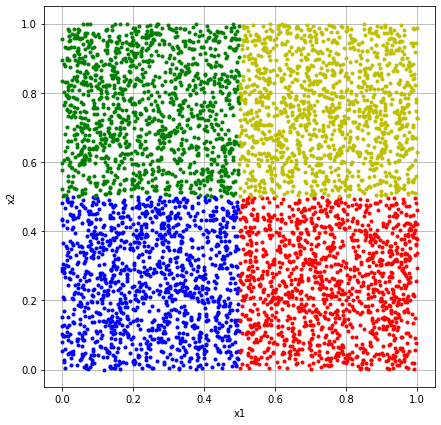

In [13]:
plt.figure(figsize=(7, 7))
plt.plot(x1[target == 'type1'], x2[target == 'type1'], 'b.')
plt.plot(x1[target == 'type2'], x2[target == 'type2'], 'r.')
plt.plot(x1[target == 'type3'], x2[target == 'type3'], 'g.')
plt.plot(x1[target == 'type4'], x2[target == 'type4'], 'y.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

# type별 색인 plot(x좌표-x1, y좌표-x2, 색깔)

## 데이터 합치기

In [14]:
def merge_data(x1, x2):
    ret = []
    for i in range(len(x1)):
        ret.append([x1[i], x2[i]])
    return np.array(ret)
# list선언후, 배열마다 리스트 순차적으로 삽입

In [16]:
data = merge_data(x1, x2)
data[0 : 5]
print() 

In [17]:
# data2 = np.zeros((5000, 2))
# data2[:, 0] = x1
# data2[:, 1] = x2
# data2

## 범주화 작업

In [19]:
encoder = LabelBinarizer()
print(target[0 : 10])
target = encoder.fit_transform(target)
# target 문자 -> 라벨링 과정
print(target[0 : 10])
print(encoder.classes_)


[[0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]]
[[0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]]
[0 1 2 3]


## 데이터 분할

In [20]:
x_train = data[0 : 4000]
t_train = target[0 : 4000]

x_test = data[4000 : ]
t_test = target[4000 : ]

## model1 = sigmoid 모델 

In [28]:
model1 = Sequential()

model1.add(Dense(16, input_dim = 2, activation = 'sigmoid' ))
# 출력 층 변수 h(t) 16개,input Dimension 2개(x,y), 활성화 함수 sigmoid(0~1) 
model1.add(Dense(32, activation = 'sigmoid' ))
model1.add(Dense(4, activation = 'softmax'))
# softmax는 출력층 함수로서 많이 사용되며, 0~1사이의 확률 값을 반환한다. 따라서, argmax를 통해, 최대 값을 뽑아 냈을때,
# 해당 최대값에 속하는 target이 input값에 대한 분류 결과이다.
# 주의할 점은 출력 값이 해당 target의 분류 개수 4개와 일치 해야한다. 

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# 정확도 함수 

hist1 = model1.fit(x_train, t_train, epochs = 50, batch_size = 20)
# 배치사이즈는 몇 문항을 풀고 해답을 맞추는 지를 의미합니다. 
# 100문항일 때, 배치사이즈가 100이면 전체를 다 풀고 난 뒤에 해답을 맞춰보는 것입니다. 

Epoch 1/50
4000/4000 [==============================] - 0s 57us/step - loss: 1.3847 - accuracy: 0.2948
Epoch 2/50
4000/4000 [==============================] - 0s 41us/step - loss: 1.3483 - accuracy: 0.4190
Epoch 3/50
4000/4000 [==============================] - 0s 41us/step - loss: 1.2930 - accuracy: 0.5608
Epoch 4/50
4000/4000 [==============================] - 0s 41us/step - loss: 1.1940 - accuracy: 0.6860
Epoch 5/50
4000/4000 [==============================] - 0s 41us/step - loss: 1.0476 - accuracy: 0.7520
Epoch 6/50
4000/4000 [==============================] - 0s 41us/step - loss: 0.8707 - accuracy: 0.8338
Epoch 7/50
4000/4000 [==============================] - 0s 41us/step - loss: 0.6930 - accuracy: 0.8852
Epoch 8/50
4000/4000 [==============================] - 0s 44us/step - loss: 0.5378 - accuracy: 0.9112
Epoch 9/50
4000/4000 [==============================] - 0s 42us/step - loss: 0.4243 - accuracy: 0.9290
Epoch 10/50
4000/4000 [==============================] - 0s 41us/step - l

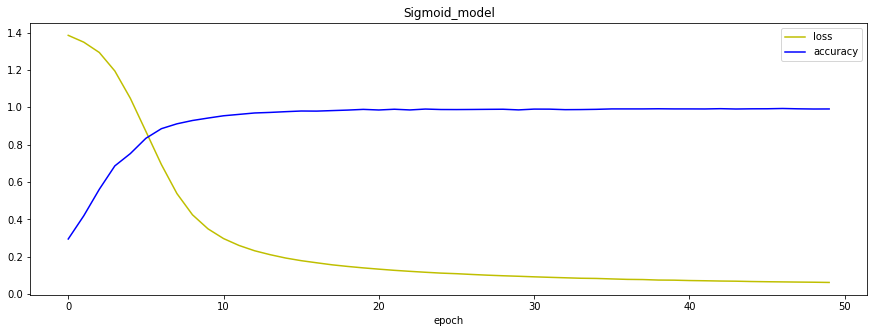

In [29]:
plt.figure(figsize = (15, 5))
plt.plot(hist1.history['loss'], 'y', label = 'loss')
plt.plot(hist1.history['accuracy'], 'b', label = 'accuracy')
plt.xlabel('epoch')
plt.title('Sigmoid_model')
plt.legend(loc = 'best')
plt.show()


## model1 평가

In [32]:
model1_loss_and_metrics = model1.evaluate(x_test, t_test, batch_size = 20)
model1_loss_and_metrics

1000/1000 [==============================] - 0s 40us/step


[0.05755630742758513, 0.9919999837875366]

## model2 = relu 모델

In [33]:
model2 = Sequential()
model2.add(Dense(16, input_dim = 2, activation = 'relu' ))
model2.add(Dense(16, activation = 'relu' ))
model2.add(Dense(4, activation = 'softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
hist2 = model2.fit(x_train, t_train, epochs = 50, batch_size = 20)

Epoch 1/50
4000/4000 [==============================] - 0s 58us/step - loss: 1.1250 - accuracy: 0.6348
Epoch 2/50
4000/4000 [==============================] - 0s 40us/step - loss: 0.6740 - accuracy: 0.7960
Epoch 3/50
4000/4000 [==============================] - 0s 40us/step - loss: 0.4207 - accuracy: 0.8817
Epoch 4/50
4000/4000 [==============================] - 0s 41us/step - loss: 0.2899 - accuracy: 0.9227
Epoch 5/50
4000/4000 [==============================] - 0s 42us/step - loss: 0.2215 - accuracy: 0.9415
Epoch 6/50
4000/4000 [==============================] - 0s 41us/step - loss: 0.1790 - accuracy: 0.9560
Epoch 7/50
4000/4000 [==============================] - 0s 41us/step - loss: 0.1517 - accuracy: 0.9668
Epoch 8/50
4000/4000 [==============================] - 0s 41us/step - loss: 0.1334 - accuracy: 0.9715
Epoch 9/50
4000/4000 [==============================] - 0s 41us/step - loss: 0.1202 - accuracy: 0.9787
Epoch 10/50
4000/4000 [==============================] - 0s 40us/step - l

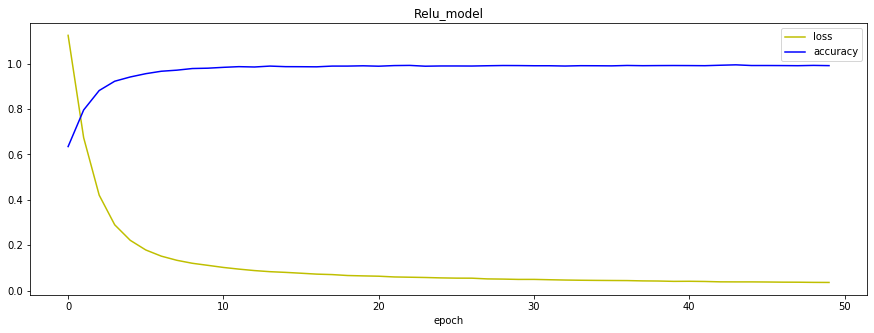

In [34]:
plt.figure(figsize = (15, 5))
plt.plot(hist2.history['loss'], 'y', label = 'loss')
plt.plot(hist2.history['accuracy'], 'b', label = 'accuracy')
plt.xlabel('epoch')
plt.title('Relu_model')
plt.legend(loc = 'best')
plt.show()


## model2 평가

In [39]:
model2_loss_and_metrics = model2.evaluate(x_test, t_test, batch_size = 20)
model2_loss_and_metrics

1000/1000 [==============================] - 0s 26us/step


[0.03517166387988255, 0.9909999966621399]

## 테스트 데이터 예측 확인

In [40]:
predict1 = model1.predict(x_test)
print(predict1)

[[9.0164714e-05 4.6439403e-08 9.9933928e-01 5.7046127e-04]
 [1.5133656e-11 4.1126335e-05 1.0367075e-07 9.9995875e-01]
 [9.2378139e-07 6.5889036e-09 9.9133295e-01 8.6660497e-03]
 ...
 [2.8350847e-08 5.7391776e-06 2.0428572e-03 9.9795145e-01]
 [3.0833782e-12 9.1348033e-07 9.5303966e-07 9.9999809e-01]
 [3.2701581e-03 4.1646797e-09 9.9672914e-01 6.9234392e-07]]


In [41]:
predict2 = model2.predict(x_test)
print(predict2)

[[9.21409282e-10 1.82966350e-14 9.99994159e-01 5.82383927e-06]
 [6.41816924e-26 2.23820504e-10 1.38890809e-15 1.00000000e+00]
 [1.01278346e-20 1.25561405e-23 9.99925733e-01 7.43115597e-05]
 ...
 [4.76394458e-17 1.04210885e-11 1.15087905e-05 9.99988437e-01]
 [3.75255436e-31 6.69958261e-17 1.61678362e-14 1.00000000e+00]
 [5.15084866e-06 3.35199180e-16 9.99994874e-01 2.83534758e-11]]


## 예측 확인

In [42]:
for i in range(len(t_test)):
    if np.argmax(t_test[i]) != np.argmax(predict1[i]):
        print(format(x_test[i, 0], "1.4f"), format(x_test[i, 1], "1.4f"), np.argmax(t_test[i]), np.argmax(predict1[i]))

0.4965 0.9387 2 3
0.4944 0.8900 2 3
0.5962 0.4950 1 3
0.4945 0.8350 2 3
0.4942 0.8096 2 3
0.7105 0.4963 1 3
0.4210 0.5012 2 0
0.4212 0.5008 2 0


In [43]:
for i in range(len(t_test)):
    if np.argmax(t_test[i]) != np.argmax(predict2[i]):
        print(format(x_test[i, 0], "1.4f"), format(x_test[i, 1], "1.4f"), np.argmax(t_test[i]), np.argmax(predict2[i]))

0.4965 0.9387 2 3
0.4944 0.8900 2 3
0.4945 0.8350 2 3
0.4942 0.8096 2 3
0.3024 0.5052 2 0
0.4881 0.8016 2 3
0.5579 0.5018 3 1
0.4210 0.5012 2 0
0.4212 0.5008 2 0
